# 01) Importar librerias correspondientes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.model_selection import GridSearchCV

# 02) Importar dataset de properati

In [4]:
pwd

'C:\\Users\\Administrator.OMSWV4XTWIYHGZM\\Documents\\ClusterAI\\clase_04-master'

In [5]:
properati = pd.read_csv (r'C:\\Users\\Administrator.OMSWV4XTWIYHGZM\\Documents\\ClusterAI\\clase_04-master/clusterai_2019_clase04_regresion_dataset_properati_caba.csv', delimiter=',', parse_dates = True)
properati.head()

,id,created_on,operation,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,1649a3c35359d681abae4a63d9a8545054d2096b,2017-09-22,sell,house,Palermo Viejo,-34.588953,-58.429882,2000000.0,312.0,NaN,NaN,NaN,NaN
1,1ab035ccbe77702987c3f09850d12c634e612aa2,2017-09-01,sell,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,NaN,3.0,NaN
2,90fc7c61b6fbc6ef99368a21cd9ac0d30d54c697,2017-09-01,sell,apartment,Barracas,-34.644924,-58.371919,140000.0,125.0,85.0,NaN,NaN,NaN
3,c195e8f3a596ab49b95d699c07e1a04be503ba68,2017-09-01,sell,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,2.0,3350.0
4,f891875ff44e6f99e30e101b3901d1e7510ef41b,2017-09-01,sell,apartment,Parque Patricios,-34.639173,-58.417069,94000.0,38.0,38.0,NaN,NaN,NaN


In [6]:
properati.shape

(25319, 13)

In [7]:
properati.columns

Index(['id', 'created_on', 'operation', 'property_type', 'neighbourhood',
       'lat', 'lon', 'price', 'surface_total_in_m2', 'surface_covered_in_m2',
       'floor', 'rooms', 'expenses'],
      dtype='object')

# 03) Revisar con que columnas trabajar para luego quitarle los NaNs (queremos predecir precio)

In [8]:
properati.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
neighbourhood                0
lat                       1048
lon                       1048
price                     1928
surface_total_in_m2       3323
surface_covered_in_m2     2529
floor                    22093
rooms                     6607
expenses                 20289
dtype: int64

In [9]:
# elimino los renglones que tienen NaNs en la columna "reviews_per_month" 
properati = properati.dropna(subset = ["price","surface_total_in_m2","surface_covered_in_m2","rooms"])

In [10]:
properati.shape

(16296, 13)

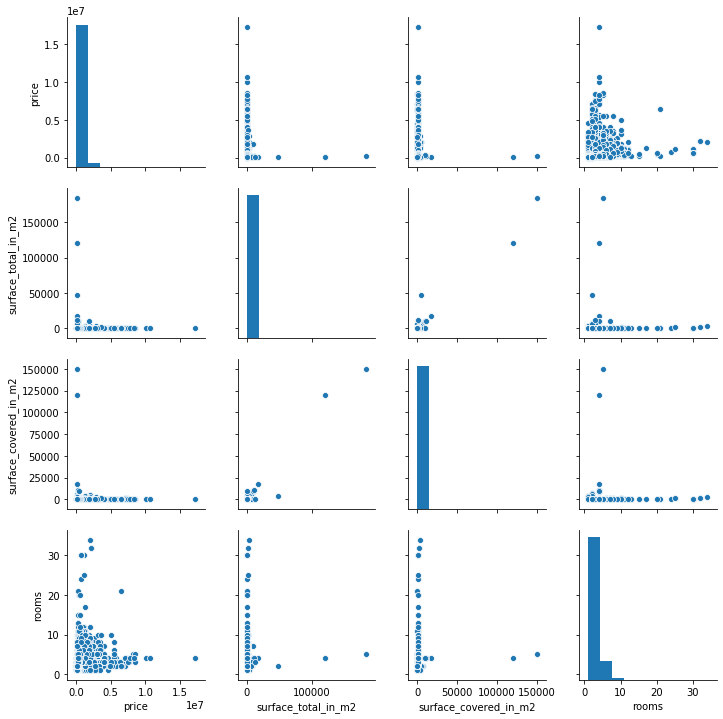

In [11]:
sns.pairplot(properati[["price", "neighbourhood", "property_type", "surface_total_in_m2","surface_covered_in_m2","rooms"]])
plt.show()

# 04) Quitar Outliers de las variables que consideren utilizando cuantiles

In [12]:
properati = properati.drop(['floor', 'expenses', 'id', 'created_on', 'operation'], axis=1)

In [13]:
properati.head(3) 

,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,rooms
1,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,3.0
3,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0
5,apartment,Flores,-34.639497,-58.531714,160000.0,76.0,76.0,3.0


In [14]:
np.max(properati)

property_type                       store
neighbourhood            Villa del Parque
lat                              -28.4443
lon                              -58.3544
price                         1.72514e+07
surface_total_in_m2                184000
surface_covered_in_m2              150000
rooms                                  34
dtype: object

In [15]:
np.mean(properati)

lat                         -34.597577
lon                         -58.437214
price                    376377.800135
surface_total_in_m2         132.683726
surface_covered_in_m2       112.556701
rooms                         2.903903
dtype: float64

In [16]:
#recordar sacarle los outliers a los precios!
price_q85 = properati.price.quantile(0.85)
print("el cuantil 0.85 de la feature 'price' es = " + str(price_q85))

el cuantil 0.85 de la feature 'price' es = 520000.0


In [17]:
# aca filtro y conservo los valores que cumplen las dos condiciones al mismo tiempo
properati = properati.loc[(properati.price < price_q85)]

In [18]:
#podria haber filtrado MAS filtrando con outliers de otros FEATURES

# 05) Realizar feature engineering si fuera necesario

In [19]:
# dummies para la feature "property_type"
neighs_dummie_pt = pd.get_dummies(properati.property_type)
neighs_dummie_pt.head(3)

,PH,apartment,house,store
1,1,0,0,0
3,0,1,0,0
5,0,1,0,0


In [20]:
# dummies para la feature "neighbourhood"
neighs_dummie_n = pd.get_dummies(properati.neighbourhood)
neighs_dummie_n.head(3)

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa General Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
properati_joint = properati.join([neighs_dummie_n,neighs_dummie_pt])
properati_joint.head()

,property_type,neighbourhood,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,rooms,Abasto,Agronomía,...,Villa Pueyrredón,Villa Real,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,PH,apartment,house,store
1,PH,Parque Chacabuco,-34.635866,-58.431048,131500.0,80.0,50.0,3.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,apartment,Recoleta,-34.596511,-58.385747,109000.0,45.0,45.0,2.0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,apartment,Flores,-34.639497,-58.531714,160000.0,76.0,76.0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,apartment,Caballito,-34.628021,-58.460598,160000.0,76.0,76.0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,apartment,Villa Crespo,-34.592540,-58.434245,240435.0,101.0,75.0,3.0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 06) Separar Y (price) & X (decidir que features utilizar para trabajar)
Recuerden realizar auto scaling sobre las variables en cuestion

In [22]:
# creamos nuestra variable dependiente (label - etiqueta) y
y = np.array(properati_joint[["price"]])
np.shape(y)

(13849, 1)

In [23]:
# retiro los features que no quiero utilizar 
x = properati_joint.drop(["price",'lat', 'lon',"property_type", "neighbourhood"], axis=1)
np.shape(x)

(13849, 68)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
#estoy entrenando con 10% porque sino tardaria mucho!!!! es nada mas por fines didacticos
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
# auto scalo mis muestras de train utilizando el scaler fiteado con el xtrain
xtrain_scal = scaler.transform(xtrain)  

In [26]:
# auto scalo mis muestras de test utilizando el scaler fiteado con el xtrain
xtest_scal = scaler.transform(xtest)  

# 07) Implementar un modelo de regresion para predecir el precio. De ser posible comparar performance de distintos modelos.

# Creo un modelo de Regresión Lineal

In [27]:
# 1) creo un modelo generico de regresion lineal
lr = LinearRegression()

In [28]:
# 2) Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain_scal, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test, sin mostrarle las labels (Ytest)
# las predicciones las guardo en el vector "ypred"
ypred = lr.predict(xtest_scal)

In [30]:
np.shape(ypred)

(1385, 1)

In [31]:
# calculo el RMSE (root mean square error) del test
RMSE_test_lr = np.sqrt(mean_squared_error(ytest, ypred))
RMSE_test_lr

68112.40102211085

In [32]:
mean_squared_error(ytest, ypred)

4639299172.996846

In [33]:
# calculo el MAE (mean absolute error) del test
from sklearn.metrics import mean_absolute_error
MAE_test_lr = mean_absolute_error(ytest, ypred)
MAE_test_lr

49785.69276314077

In [34]:
# voy a hacer lo mismo pero para los datos de train
ytrainpred = lr.predict(xtrain_scal)

In [35]:
# calculo el RMSE (root mean square error) del train
RMSE_train_lr = np.sqrt(mean_squared_error(ytrain, ytrainpred))
RMSE_train_lr

68560.44242546847

In [36]:
mean_squared_error(ytrain, ytrainpred)

4700534265.575977

In [37]:
# calculo el MAE (mean absolute error) del train
MAE_train_lr = mean_absolute_error(ytrain, ytrainpred)
MAE_train_lr

49982.96518785941

# Creo un modelo de KNN Regression

In [38]:
# creamos nuestro modelo de KNN que se llama neigh
neigh = KNeighborsRegressor(weights = "distance")

In [39]:
# creo un array de 5 posiciones con los valores del hiperparametro "k" que quiero probar por gridsearch. Para no tardar tanto.. tratra de ir de a 3 k
parameters_k = np.arange(5,20,5)
parameters_k

array([ 5, 10, 15])

In [40]:
# indico la cantidad de folds que quiero utilizar en mi training para cross validation
n_folds = 5

In [41]:
# creo un diccionario "tuned_params" con los parametros que quiero optimizar, e indico que valores de
# ese parametro quiero probar
parameters_knn = [{'n_neighbors': parameters_k}]

In [42]:
# creo un modelo que contiene, el regresor a utilizar, la grilla de parametros a probar
# y la cantidad de folds para el cross validation
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv=n_folds, verbose=True)

In [43]:
# entreno modelo regresor con mi set de entrenamiento (tanto Xtrain como Ytrain)
regresor_neigh.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   39.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 5, 10, 15])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [44]:
# observo cual fue el parametro que "gano" en el cross validation y grid search
regresor_neigh.best_params_

{'n_neighbors': 10}

In [45]:
# calcula el R2... no nos dice nada
regresor_neigh.best_score_

0.7572622747201171

In [46]:
# realizo con mi modelo entrenado, predicciones de Y (ypred) utilizando solo xtest
ypred2 = regresor_neigh.predict(xtest_scal)
ypred2

array([[373717.15538235],
       [292500.        ],
       [156000.        ],
       ...,
       [101500.        ],
       [485000.        ],
       [114555.55555556]])

In [47]:
# computo la raiz cuadrada del error cuadratico medio (RMSE (root mean square error)) entre ytest (etiqueta real) 
# vs ypred (etiqueta estimada por el modelo)
RMSE_test_knn = np.sqrt(mean_squared_error(ytest, ypred2))
RMSE_test_knn

48360.7639056388

In [48]:
# calculo el MAE (mean absolute error) del test
MAE_test_knn = mean_absolute_error(ytest, ypred2)
MAE_test_knn

30878.08939165402

In [49]:
mean_absolute_error(ytest, ypred2)

30878.08939165402

In [50]:
# visualiza el rango de valores de las etiquetas de test
#sns.distplot(ytest)
#plt.show()

In [51]:
# voy a hacer lo mismo pero para los datos de train
ytrainpred2 = regresor_neigh.predict(xtrain_scal)

In [52]:
# calculo el RMSE (root mean square error) del train
RMSE_train_knn = np.sqrt(mean_squared_error(ytrain, ytrainpred2))
RMSE_train_knn

12194.552358592005

In [53]:
mean_squared_error(ytrain, ytrainpred2)

148707107.22644183

In [54]:
# calculo el MAE (mean absolute error) del train
MAE_train_knn = mean_absolute_error(ytrain, ytrainpred2)
MAE_train_knn

4314.248281144935

# Probamos un modelo regresor Support Vector Regression

In [55]:
# creo un modelo de SVR
svreg = SVR()

In [56]:
# cantidad de folds para el cross validation
n_folds = 5

In [57]:
# Distintos hiper parametros a probar en grid search (pruebo gridsearch por kernels separados)
parameters_svr_lin = [{'kernel':['linear'], 'C': [1, 100]}]

parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]

In [58]:
regresor_svr = GridSearchCV(svreg, parameters_svr_lin, cv=n_folds, verbose=True)

In [59]:
# entreno modelo regresor con mi set de entrenamiento (tanto Xtrain como Ytrain)
regresor_svr.fit(xtrain_scal, ytrain.ravel())
#svr_lin.fit(xtrain_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 100], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [60]:
# vemos cuales son los mejores parametros luego del cross validation
regresor_svr.best_params_

{'C': 100, 'kernel': 'linear'}

In [61]:
# R2
regresor_svr.best_score_

0.5403057183955408

In [62]:
# realizo con mi modelo entrenado, predicciones de Y (ypred) utilizando solo xtest
ypred3 = regresor_svr.predict(xtest_scal)
ypred3

array([284950.75692448, 274948.1070499 , 167059.8641871 , ...,
       119006.31215461, 364901.55465194, 165057.52678841])

In [63]:
# computo RMSE (root mean squared error) -> cuando le doy importancia a grandes errores
RMSE_test_svr = np.sqrt(mean_squared_error(ytest, ypred3))
RMSE_test_svr

69730.20689700033

In [64]:
mean_squared_error(ytest, ypred2)

2338763485.5369368

In [65]:
# calculo el MAE (mean absolute error) del test
MAE_test_svr = mean_absolute_error(ytest, ypred3)
MAE_test_svr

48754.25989296596

In [70]:
# voy a hacer lo mismo pero para los datos de train
ytrainpred3 = regresor_svr.predict(xtrain_scal)

In [71]:
# calculo el RMSE (root mean square error) del train
RMSE_train_svr = np.sqrt(mean_squared_error(ytrain, ytrainpred3))
RMSE_train_svr

69930.16394661096

In [72]:
mean_squared_error(ytrain, ytrainpred3)

4890227829.599888

In [73]:
# calculo el MAE (mean absolute error) del train
MAE_train_svr = mean_absolute_error(ytrain, ytrainpred3)
MAE_train_svr

49282.18843446082